<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Susceptibilitytests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import io
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import f_oneway
from google.colab import files

In [4]:
data = files.upload()

Saving project data.csv to project data.csv


In [5]:
#converting the file into a dataframe
data= pd.read_csv(io.StringIO(data['project data.csv'].decode('utf-8')))
#view the dataframe
data.head()

,Raw data,E.coli,S.aureus,B.subtilis,C.albicans
0,Ampicillin,6,24,12,0
1,Chloromphenicol,28,30,6,0
2,COT,6,26,24,0
3,Penicillin,6,6,13,0
4,Gentamycin,20,15,30,0


In [6]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [12]:
# Clean column names
data.columns = data.columns.str.strip()

# Reshape data to long format
data_melted = data.melt(id_vars=["Raw data"], var_name="Isolate", value_name="Zone_Diameter")

data.head()

,Raw data,E.coli,S.aureus,B.subtilis,C.albicans
0,Ampicillin,6,24,12,0
1,Chloromphenicol,28,30,6,0
2,COT,6,26,24,0
3,Penicillin,6,6,13,0
4,Gentamycin,20,15,30,0


In [20]:
# Check for missing values and data types
print(data_melted.info())

# Check unique values in key columns
print("Unique Treatments:", data_melted["Raw data"].unique())
print("Unique Isolates:", data_melted["Isolate"].unique())

# Check for any NaN values in the dataset
print(data_melted.isnull().sum())

# Preview the first few rows
print(data_melted.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Raw data       68 non-null     object
 1   Isolate        68 non-null     object
 2   Zone_Diameter  68 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ KB
None
Unique Treatments: ['Ampicillin ' 'Chloromphenicol' 'COT ' 'Penicillin ' 'Gentamycin ' 'CAZ'
 'Amikyacin' 'Cephtriaxone' 'Cefuroxime' 'T1' 'T1y' 'T2b' 'T5b' 'T5a'
 'Th4' 'T4b' 'sterile water ']
Unique Isolates: ['E.coli' 'S.aureus' 'B.subtilis' 'C.albicans']
Raw data         0
Isolate          0
Zone_Diameter    0
dtype: int64
          Raw data Isolate  Zone_Diameter
0      Ampicillin   E.coli              6
1  Chloromphenicol  E.coli             28
2             COT   E.coli              6
3      Penicillin   E.coli              6
4      Gentamycin   E.coli             20


In [25]:
#ONE-WAY ANOVA Hypothesis
#Null:There is no significant difference in the zone of inhibition among the different treatments (antibiotics and secondary metabolites).
#Alternative: At least one treatment has a significantly different zone of inhibition compared to the others.

In [27]:
data_melted.rename(columns={'Raw data': 'Raw_data'}, inplace=True)

In [34]:
#One-way ANOVA
model = ols('Zone_Diameter ~ C(Raw_data)', data=data_melted).fit() # Assuming 'Raw_data' is the column name and needs to be treated as categorical
anova_table = sm.stats.anova_lm(model, typ=2)
# Display ANOVA results
print(anova_table)

                  sum_sq    df         F    PR(>F)
C(Raw_data)  1079.970588  16.0  1.206803  0.295234
Residual     2852.500000  51.0       NaN       NaN


In [ ]:
#In conclusion, we accept the null hypothesis , there is no significant difference between the groups in my study


In [ ]:
#Hypotheses for two way ANOVA
#Null; Different isolates do not show significant differences in susceptibility.
#Alternative: At least one isolate has significantly different susceptibility.
#Null;There is no significant difference in inhibition zones between different antibiotics/metabolites.
#Alternative;At least one treatment differs significantly.

In [35]:
# Perform One-Way ANOVA
model = ols('Zone_Diameter ~ C(Isolate) + C(Raw_data)', data=data_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)
# Display ANOVA results
print(anova_table)

                  sum_sq    df         F    PR(>F)
C(Isolate)    661.058824   3.0  4.826477  0.005132
C(Raw_data)  1079.970588  16.0  1.478439  0.147567
Residual     2191.441176  48.0       NaN       NaN
                  sum_sq    df         F    PR(>F)
C(Isolate)    661.058824   3.0  4.826477  0.005132
C(Raw_data)  1079.970588  16.0  1.478439  0.147567
Residual     2191.441176  48.0       NaN       NaN


In [ ]:
#The 'Isolate' factor has a significant impact on your dependent variable, while 'Raw_data' does not.

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data_melted['Zone_Diameter'], groups=data_melted['Isolate'], alpha=0.05)
print("Tukey's HSD Test Results:")
print(tukey)


Tukey's HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
B.subtilis C.albicans  -6.1765 0.0665 -12.6452  0.2922  False
B.subtilis     E.coli      0.0    1.0  -6.4687  6.4687  False
B.subtilis   S.aureus   2.1765 0.8113  -4.2922  8.6452  False
C.albicans     E.coli   6.1765 0.0665  -0.2922 12.6452  False
C.albicans   S.aureus   8.3529 0.0061   1.8843 14.8216   True
    E.coli   S.aureus   2.1765 0.8113  -4.2922  8.6452  False
-------------------------------------------------------------


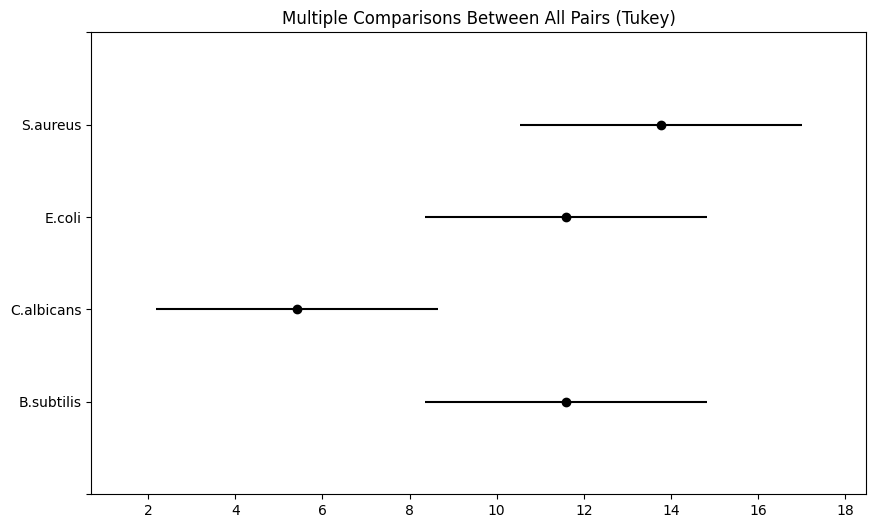

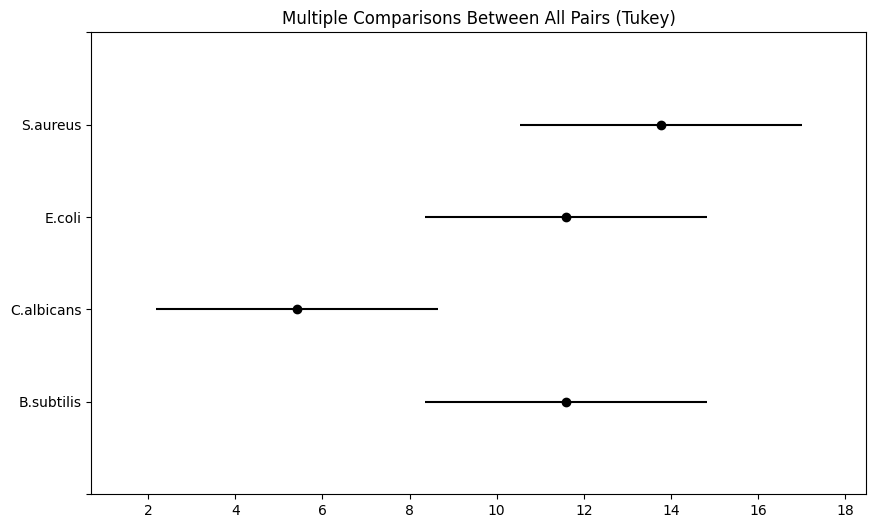

In [45]:
# Plot the results
tukey.plot_simultaneous()